In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import numpy as np
if os.name != 'posix':
    sys.path.append('E:\\flight-muscles\\src')
    sys.path.append('E:\\flight-muscles\\packages')
import arenaclouds as acld
import pylab as plb
#%pylab

/media/analysis-code/flight-muscles/packages/transformations.py:1888: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


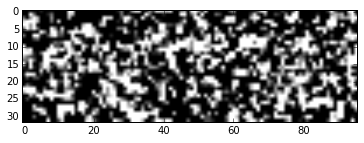

In [4]:
reload(acld)
from scipy import io
frame_rate = 50.0 
acld.display_shape = (96,32)
deg_per_pix = 360/acld.display_shape[0]
translation_velocity = 0.3 #2.25*frame_rate
#equator_pole = deg2rad(90)
forward_trans_pole = np.deg2rad(90)
backward_trans_pole = np.deg2rad(270)
upward_trans_pole = np.deg2rad(90)
downward_trans_pole = np.deg2rad(270)
bit_depth = 3
step_duration = 3
static_duration = 10
step_frames = step_duration*frame_rate
static_frames = static_duration*frame_rate
base_angular_velocity = (2*np.pi)/4 #1/4 rev/sec

poles = [(pole_deg,deg2rad(pole_deg)) for pole_deg in range(0,360,30)]
shuffle(poles)
for i in [1]:
    for rep in range(4):
        imgs = acld.make_spin_pattern_equator(poles[rep][1],
                                    base_angular_velocity*i,
                                    frame_rate,
                                    max_sensory_radius = 3.0,
                                    star_density = 8)
        #roll_imgs = acld.adjust_depth(roll_imgs_180)
        roll_imgs = imgs[:,:,:-1]
        from scipy.fftpack import ifftn,fftn
        rmtrx = roll_imgs
        fde = rfftn(rmtrx)
        phs = np.angle(fde)
        phs = phs.ravel()
        ph_shift = random.permutation(phs)
        ph_shift = ph_shift.reshape(shape(fde))
        f_phrand = fde*exp((0+1j)*ph_shift)
        phrand = ifftn(f_phrand).real
        phrand[phrand<0] = 0
        ctrl = acld.adjust_depth(phrand).astype(int8)
        acld.play_pattern(ctrl)
        ctrl = ctrl[:,:,:,np.newaxis]
        #io.savemat('./stimulus_data/step_ptch_roll_phsrndm_v%s_rep%s'%(i,rep),{'imgs':ctrl})

In [11]:
for i in [1]:
    for rep in range(4):
        control_poles = [deg2rad(pole_deg) for pole_deg in range(0,360,30)]
        imgs = acld.make_control_pattern_equator(control_poles,
                                          base_angular_velocity*1,
                                          frame_rate,
                                          max_sensory_radius = 3.0,
                                          star_density = 8)
        multipole = acld.adjust_depth(imgs)
        acld.play_pattern(multipole)
        multipole = multipole[:,:,:,np.newaxis]
        io.savemat('./stimulus_data/step_ptch_roll_multipole_v%s_rep%s'%(i,rep),{'imgs':multipole})

In [7]:
reload(acld)
from scipy import io
frame_rate = 50.0 
acld.display_shape = (96,32)
deg_per_pix = 360/acld.display_shape[0]
translation_velocity = 0.3 #2.25*frame_rate
#equator_pole = deg2rad(90)
forward_trans_pole = np.deg2rad(90)
backward_trans_pole = np.deg2rad(270)
upward_trans_pole = np.deg2rad(90)
downward_trans_pole = np.deg2rad(270)
bit_depth = 3
step_duration = 3
static_duration = 10
step_frames = step_duration*frame_rate
static_frames = static_duration*frame_rate
base_angular_velocity = (2*np.pi)/4 #1/4 rev/sec

##################yaw
poles = [(pole_deg,deg2rad(pole_deg)) for pole_deg in range(0,360,30)]
for i in [1]:
    for rep in range(4):
        for p_deg,p_rad in poles:
            roll_imgs_180 = acld.make_spin_pattern_equator(p_rad,
                                        base_angular_velocity*i,
                                        frame_rate,
                                        max_sensory_radius = 3.0,
                                        star_density = 8)
            roll_imgs = acld.adjust_depth(roll_imgs_180)
            roll_imgs = roll_imgs[:,:,:-1]
            #acld.play_pattern(roll_imgs)
            roll_imgs = roll_imgs[:,:,:,np.newaxis]
            #io.savemat('./stimulus_data/step_ptch_roll_%03d_v%s_rep%s'%(p_deg,i,rep),{'imgs':roll_imgs})
            print ('./stimulus_data/step_ptch_roll_%03d_v%s_rep%s'%(p_deg,i,rep))
            #io.savemat('./stimulus_data/step_roll_%s_v%s_rep%s'%(p_deg,i,rep),{'imgs':roll_imgs})

./stimulus_data/step_ptch_roll_000_v1_rep0
./stimulus_data/step_ptch_roll_030_v1_rep0
./stimulus_data/step_ptch_roll_060_v1_rep0
./stimulus_data/step_ptch_roll_090_v1_rep0
./stimulus_data/step_ptch_roll_120_v1_rep0
./stimulus_data/step_ptch_roll_150_v1_rep0
./stimulus_data/step_ptch_roll_180_v1_rep0
./stimulus_data/step_ptch_roll_210_v1_rep0
./stimulus_data/step_ptch_roll_240_v1_rep0
./stimulus_data/step_ptch_roll_270_v1_rep0
./stimulus_data/step_ptch_roll_300_v1_rep0
./stimulus_data/step_ptch_roll_330_v1_rep0
./stimulus_data/step_ptch_roll_000_v1_rep1
./stimulus_data/step_ptch_roll_030_v1_rep1
./stimulus_data/step_ptch_roll_060_v1_rep1
./stimulus_data/step_ptch_roll_090_v1_rep1
./stimulus_data/step_ptch_roll_120_v1_rep1
./stimulus_data/step_ptch_roll_150_v1_rep1
./stimulus_data/step_ptch_roll_180_v1_rep1
./stimulus_data/step_ptch_roll_210_v1_rep1
./stimulus_data/step_ptch_roll_240_v1_rep1
./stimulus_data/step_ptch_roll_270_v1_rep1
./stimulus_data/step_ptch_roll_300_v1_rep1
./stimulus_

In [20]:
function = np.hstack(np.ones(6*frame_rate)*50)
io.savemat('./stimulus_data/function_%ss.mat'%('3s_50Hz_step'),{'func':function})

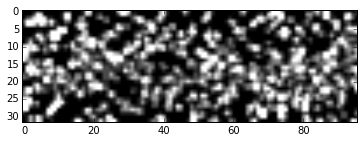

In [14]:
imshow(roll_imgs[:,:,0,0],cmap = cm.gray)

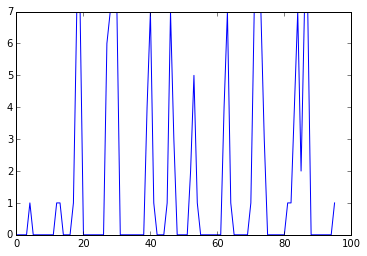

In [17]:
plot(roll_imgs[0,:,0,0])

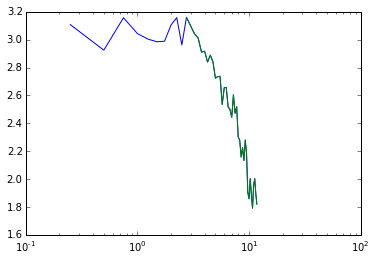

In [68]:
ps = np.mean([np.abs(np.fft.fft(roll_imgs[i,:,0,0]))**2 for i in range(30)],axis = 0)
freqs = np.fft.fftfreq(roll_imgs[0,:,0,0].size,4.0/96.0)
posmask = freqs > 0
plot(freqs[posmask],log10(ps[posmask]))
gca().set_xscale('log')
#plot([96/360.0],log10([1000]),'o')
rolloff_mask = (freqs>10**0.4)
plot(freqs[rolloff_mask],log10(ps[rolloff_mask]))

In [64]:
from scipy import stats
import numpy as np
x = log10(freqs[rolloff_mask])
y = log10(ps[rolloff_mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [65]:
slope

-2.1727868784521625